#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

March 8, 2016

## Next Steps of Our Project

Goals of this notebook:
* Explore more aspects of our data
* Create clearer visualizations
    * (Following up on Paul's suggestion) Plotting the frequencies of emotional levels relative to drug-free respondents

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/greenteawarrior/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We want to explore more features of our data to learn more about the axes of diversity we were initially interested in.  

We also want to modify the presentation of our visualizations from the previous notebook to make them clearer and more impactful.

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [4]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [5]:
df.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1275.597449,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,2,2,5191.071173,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,3,3,419.742011,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,...,1,1,2,1,1,2,2,1449.303889,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,...,1,1,1,1,1,1,1,15344.293577,30012,2


In [18]:
def mh_compare(df, s30, emotion, substancestr, emotionstr, save=False):
    
    """
    df: dataframe of interest
    s30: subtance of interest
    emotion: mental health aspect of interest
    
    inputs for plotting purposes
    substancestr: human readable string of the substance 
    emotionstr: human readable string of the emotion
    """
        
    # convert 91 and 93 to 0 days (easier to understand when looking at plot)
    df.loc[df[s30] == 91, s30] = 0 # never had substance
    df.loc[df[s30] == 93, s30] = 0 # haven't had substance in the past month
    df_subset = df[df[s30] < 31]
    df_subset= df_subset[df_subset[emotion] < 6]
    
    # BRACKET column
    df_subset['BRACKET'] = df_subset[s30]
    df_subset.loc[df_subset[s30] >= 27, 'BRACKET'] = 6 #  27-30 days of substance usage per month    
    df_subset.loc[df_subset[s30] < 27, 'BRACKET'] = 5 #  20-27 days of substance usage per month
    df_subset.loc[df_subset[s30] < 20, 'BRACKET'] = 4 #  13-19 days of substance usage per month
    df_subset.loc[df_subset[s30] < 13, 'BRACKET'] = 3 #  7-12 days of substance usage per month
    df_subset.loc[df_subset[s30] < 7, 'BRACKET'] = 2 #  3-6 days of substance usage per month
    df_subset.loc[df_subset[s30] < 3, 'BRACKET'] = 1 # 1 or 2 days of substance usage per month
    df_subset.loc[df_subset[s30] == 0, 'BRACKET'] = 0 # never had substance       
    
    # groupby operation --> plotting_df --> subgroups (each subgroup will be a line on the resulting plot)
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped[emotion].value_counts(normalize=True)        
    bracket_data = [
                    {'BRACKET': br, emotion: em, 'counts': c}
                    for (br, em), c in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    plotting_df = plotting_df.sort_values(["BRACKET", emotion])
    
    subgroups = plotting_df.groupby(emotion)
    
    # Plotting!
    fig = plt.figure(figsize=(10, 7))
    current_palette = sns.color_palette()
    
    for i in range(1,6):
        s = subgroups.get_group(i).head()
        s["ratios"] = s["counts"] / float(s.iloc[0].counts)
        sns.pointplot(s["BRACKET"], s["ratios"], color=current_palette[i])
    
    plt.xlabel("Substance Usage", fontsize=14)
    plt.ylabel("Frequency of Emotional Level Relative to Drug-Free Respondents", fontsize=14)
    
    legend = plt.legend(["All of the time", 
                         "Most of the time", 
                         "Sometimes", 
                         "A little of the time", 
                         "None of the time"], 
                         bbox_to_anchor=(1.05, 1), 
                         loc=2, 
                         fontsize=14)
    legend.legendHandles[0].set_color(current_palette[1])
    legend.legendHandles[1].set_color(current_palette[2])
    legend.legendHandles[2].set_color(current_palette[3])
    legend.legendHandles[3].set_color(current_palette[4])
    legend.legendHandles[4].set_color(current_palette[5])
    
    ax = plt.gca()
    ax.set_xticklabels(['Never', 'Rarely', 'Weekly', 'Biweekly', 'Frequently', 'Heavily', 'Daily'], fontsize=14)
    plt.tick_params(labelsize=14)
    
    plt.title("%s Usage and %s Trends" % (substancestr, emotionstr), fontsize=16)
    
    if save:
        plt.savefig("mh_compare_%s_%s.pdf" % (substancestr, emotionstr), format="pdf")
    
    return

#### Cigarette Usage Trends

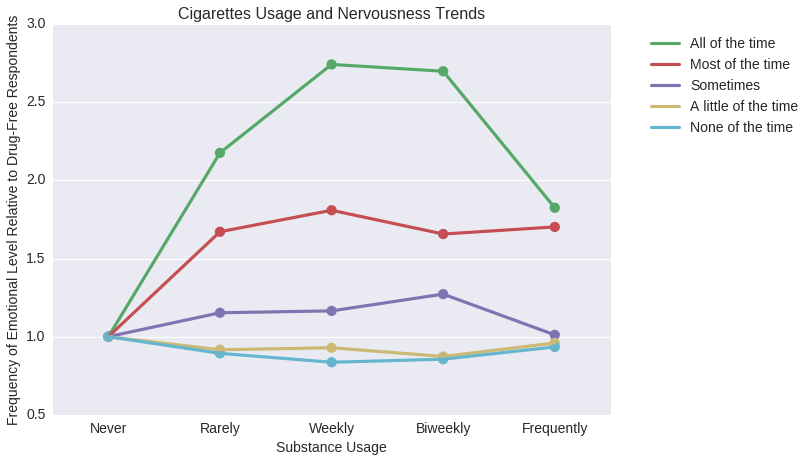

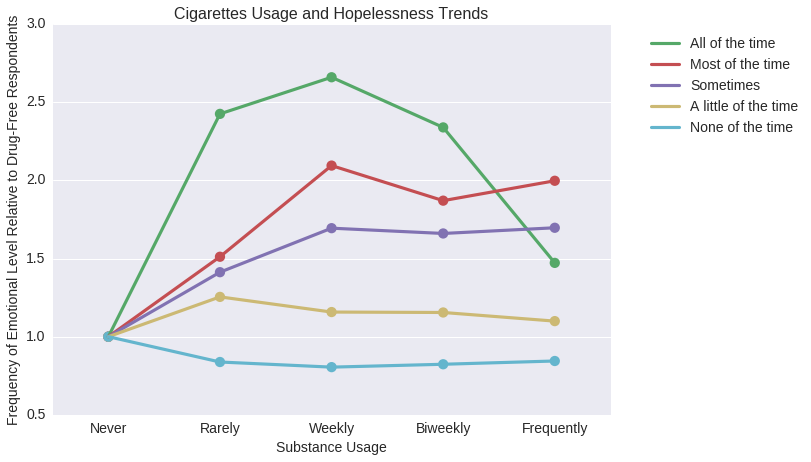

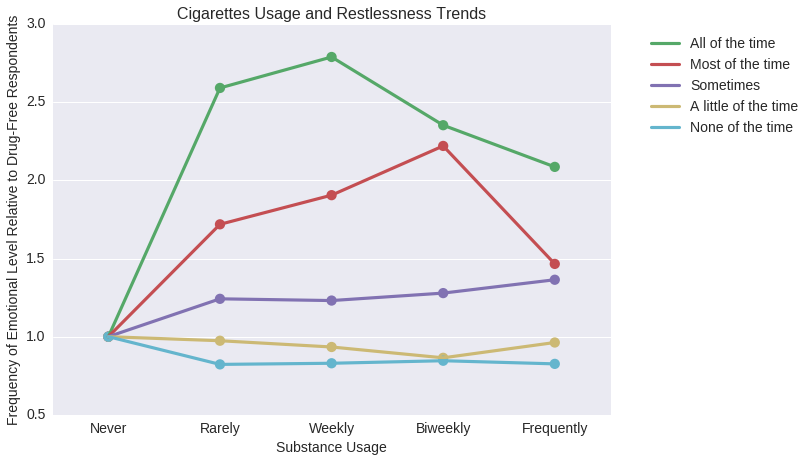

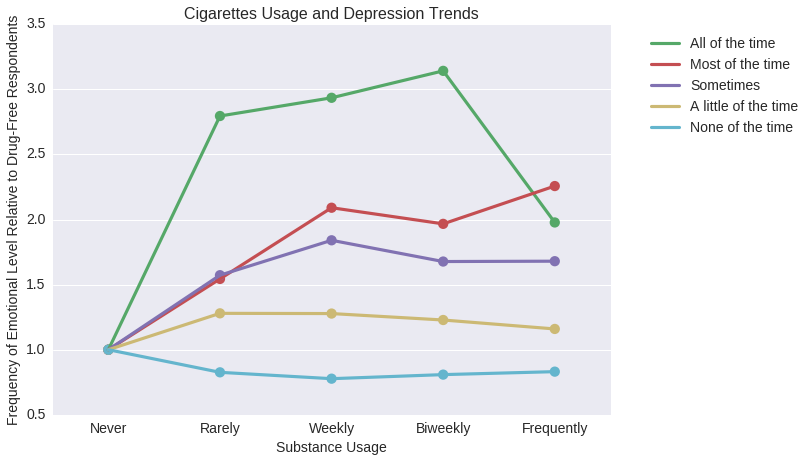

In [19]:
mh_compare(df, "CIG30USE", "DSTNRV30", "Cigarettes", "Nervousness", save=False)
mh_compare(df, "CIG30USE", "DSTHOP30", "Cigarettes", "Hopelessness", save=False)
mh_compare(df, "CIG30USE", "DSTRST30", "Cigarettes", "Restlessness", save=False)
mh_compare(df, "CIG30USE", "DSTCHR30", "Cigarettes", "Depression", save=False)